# **Step-by-Step Approach to Modeling (LSTM and GRU):**

**1. Setup and Data Preparation:**
Import necessary libraries: TensorFlow/Keras, NumPy, Pandas, Matplotlib, etc.


Load and preview the dataset for next word prediction.


Clean, tokenize, and convert the text into numerical sequences.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam


In [3]:
with open('LSTM DATA.txt', 'r', encoding='utf-8') as file:
    text = file.read()

print("Sample text snippet:\n", text[:500])  # Preview first 500 characters


Sample text snippet:
 ﻿The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



In [4]:
import re

def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r'[^a-zA-Z0-9\s]', '', txt)  # Remove punctuation/special chars
    txt = re.sub(r'\s+', ' ', txt).strip()    # Remove extra spaces
    return txt

cleaned_text = clean_text(text)
print(cleaned_text[:500])


the project gutenberg ebook of pride and prejudice this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or reuse it under the terms of the project gutenberg license included with this ebook or online at wwwgutenbergorg if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title pride an


In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_text])

total_words = len(tokenizer.word_index) + 1
print(f'Total unique words: {total_words}')


Total unique words: 7603


In [6]:
import tensorflow.keras.backend as K
K.clear_session()

In [7]:
max_sequence_len = 50  # choose a reasonable length

input_sequences = []
token_list = tokenizer.texts_to_sequences([cleaned_text])[0]

for i in range(max_sequence_len, len(token_list)):
    n_gram_sequence = token_list[i - max_sequence_len:i + 1]
    input_sequences.append(n_gram_sequence)

# Pad sequences to same length (max_sequence_len + 1)
from tensorflow.keras.preprocessing.sequence import pad_sequences

input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len + 1, padding='pre')

print(f'Total sequences: {len(input_sequences_padded)}')
print(f'Sequence shape: {input_sequences_padded.shape}')


Total sequences: 130289
Sequence shape: (130289, 51)


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

print(f'Max sequence length: {max_sequence_len}')
print(input_sequences_padded[:5])  # Preview first 5 sequences


Max sequence length: 51
[[   1  182  188  990    3  300    4  889   41  990   23   21    1  528
     3  541 2613    8    1  674  718    4   92   78 1391    3    1  217
    25   40 1546    4   20  249   40 2614 3249   14   87 1052   12  131
    12  136   52 3250   12  386    1  368    3]
 [ 182  188  990    3  300    4  889   41  990   23   21    1  528    3
   541 2613    8    1  674  718    4   92   78 1391    3    1  217   25
    40 1546    4   20  249   40 2614 3249   14   87 1052   12  131   12
   136   52 3250   12  386    1  368    3    1]
 [ 188  990    3  300    4  889   41  990   23   21    1  528    3  541
  2613    8    1  674  718    4   92   78 1391    3    1  217   25   40
  1546    4   20  249   40 2614 3249   14   87 1052   12  131   12  136
    52 3250   12  386    1  368    3    1  182]
 [ 990    3  300    4  889   41  990   23   21    1  528    3  541 2613
     8    1  674  718    4   92   78 1391    3    1  217   25   40 1546
     4   20  249   40 2614 3249   14   8

In [9]:
X = input_sequences_padded[:, :-1]
y = input_sequences_padded[:, -1]

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=total_words)

print(X.shape, y.shape)


(130289, 50) (130289, 7603)


# ***2. Sequence Generation:***

Generate n-gram input sequences and labels for training.


Use padding to ensure uniform input length.


In [10]:
max_sequence_len = 50  # or any length you choose

input_sequences = []
token_list = tokenizer.texts_to_sequences([cleaned_text])[0]

for i in range(max_sequence_len, len(token_list)):
    # Extract sequence of max_sequence_len + 1 tokens: input + label
    n_gram_sequence = token_list[i - max_sequence_len:i + 1]
    input_sequences.append(n_gram_sequence)


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to length max_sequence_len + 1
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len + 1, padding='pre')


In [12]:
import numpy as np

X = input_sequences_padded[:, :-1]  # all but last token
y = input_sequences_padded[:, -1]   # last token


In [13]:
max_sequence_len = 50
input_sequences = []
token_list = tokenizer.texts_to_sequences([cleaned_text])[0]

for i in range(max_sequence_len, len(token_list)):
    n_gram_sequence = token_list[i - max_sequence_len:i + 1]
    input_sequences.append(n_gram_sequence)

input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len + 1, padding='pre')

X = input_sequences_padded[:, :-1]
y = input_sequences_padded[:, -1]

from tensorflow.keras.utils import to_categorical
total_words = len(tokenizer.word_index) + 1
y = to_categorical(y, num_classes=total_words)

print(f'Input shape: {X.shape}')
print(f'Label shape: {y.shape}')


Input shape: (130289, 50)
Label shape: (130289, 7603)


# ***3. Define Model Architectures:***

Build both LSTM and GRU models.


Use embedding layers and recurrent layers accordingly.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

def build_lstm_model(hidden_units=128, learning_rate=0.001, sequence_length=50, vocab_size=None, embedding_dim=100):
    """
    Builds and compiles an LSTM model for next word prediction.

    Parameters:
    - hidden_units: number of units in LSTM layer
    - learning_rate: optimizer learning rate
    - sequence_length: length of input sequences
    - vocab_size: size of vocabulary
    - embedding_dim: dimension of embedding vectors

    Returns:
    - compiled Keras model
    """
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
    model.add(LSTM(hidden_units))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [15]:
from tensorflow.keras.layers import GRU

def build_gru_model(hidden_units=128, learning_rate=0.001, sequence_length=50, vocab_size=None, embedding_dim=100):
    """
    Builds and compiles a GRU model for next word prediction.

    Parameters are same as build_lstm_model.

    Returns:
    - compiled Keras model
    """
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))
    model.add(GRU(hidden_units))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [16]:
vocab_size = total_words  # from tokenizer
sequence_length = max_sequence_len  # from previous step

model = build_lstm_model(hidden_units=128, learning_rate=0.001, sequence_length=X.shape, vocab_size=y.shape)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
def build_lstm_model(hidden_units=128, learning_rate=0.001, sequence_length=50, vocab_size=None, embedding_dim=100):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))  # input_length is critical
    model.add(LSTM(hidden_units))
    model.add(Dense(vocab_size, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [20]:
model.build(input_shape=(None, sequence_length))  # batch size can be None
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 100)        │       760,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7603)           │       980,787 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,858,335 (7.09 MB)

 Trainable params: 1,858,335 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
vocab_size = len(tokenizer.word_index) + 1
sequence_length = max_sequence_len

model = build_lstm_model(
    hidden_units=128,
    learning_rate=0.001,
    sequence_length=sequence_length,
    vocab_size=vocab_size,
    embedding_dim=100
)

# Build model explicitly:
model.build(input_shape=(None, sequence_length))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 50, 100)        │       760,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7603)           │       980,787 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,858,335 (7.09 MB)

 Trainable params: 1,858,335 (7.09 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
vocab_size = len(tokenizer.word_index) + 1  # number of unique tokens + 1
sequence_length = 50  # fixed length of input sequences

model = build_gru_model(
    hidden_units=128,
    learning_rate=0.001,
    sequence_length=sequence_length,
    vocab_size=vocab_size,
    embedding_dim=100
)

# Build the model explicitly before summary
model.build(input_shape=(None, sequence_length))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 100)        │       760,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7603)           │       980,787 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,829,407 (6.98 MB)

 Trainable params: 1,829,407 (6.98 MB)

 Non-trainable params: 0 (0.00 B)

# ***4. Compile and Train Models:***

Compile using categorical_crossentropy and adam.


Train using model.fit() while monitoring validation loss.


In [9]:
sample_text = """hello world hello machine learning hello deep learning hello ai"""


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts([sample_text])
total_words = len(tokenizer.word_index) + 1

# Convert text to tokens
token_list = tokenizer.texts_to_sequences([sample_text])[0]

# Generate fixed-length sequences with max length 3 (for example)
max_sequence_len = 3
input_sequences = []

for i in range(max_sequence_len, len(token_list)):
    seq = token_list[i - max_sequence_len:i + 1]
    input_sequences.append(seq)

# Pad sequences
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len + 1, padding='pre')

# Split features and labels
X = input_sequences_padded[:, :-1]
y = input_sequences_padded[:, -1]

# One-hot encode labels
y = to_categorical(y, num_classes=total_words)
print(X)
print(y)


[[1 3 1]
 [3 1 4]
 [1 4 2]
 [4 2 1]
 [2 1 5]
 [1 5 2]
 [5 2 1]]
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=total_words))
model.add(LSTM(32))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
vocab_size = len(tokenizer.word_index) + 1
sequence_length = X

model = build_lstm_model(
    hidden_units=128,
    learning_rate=0.001,
    sequence_length=total_words,
    vocab_size=vocab_size,
    embedding_dim=100
)

# Build model explicitly:
model.build(input_shape=(None, total_words))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 7, 100)         │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,851 (464.26 KB)

 Trainable params: 118,851 (464.26 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X, y, epochs=50, batch_size=2, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0000e+00 - loss: 1.9564
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3810 - loss: 1.8964
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2976 - loss: 1.8486
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1405 - loss: 1.7391     
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3881 - loss: 1.6688
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3810 - loss: 1.5991 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4810 - loss: 1.4694
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1976 - loss: 1.6125     
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1405 - loss: 1.4125    
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2881 - loss: 1.5822    
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5214 - loss: 1.3117
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 

# **5. Evaluate and Compare:**

Use validation accuracy or perplexity for evaluation.


Plot and compare loss/accuracy curves for LSTM vs. GRU.


In [18]:
sample_text = "hello world hello machine learning hello deep learning hello ai"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

tokenizer = Tokenizer()
tokenizer.fit_on_texts([sample_text])
total_words = len(tokenizer.word_index) + 1

token_list = tokenizer.texts_to_sequences([sample_text])[0]

max_sequence_len = 3
input_sequences = []

for i in range(max_sequence_len, len(token_list)):
    seq = token_list[i - max_sequence_len:i + 1]
    input_sequences.append(seq)

input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_len + 1, padding='pre')

X = input_sequences_padded[:, :-1]
y = input_sequences_padded[:, -1]
y = to_categorical(y, num_classes=total_words)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

def build_lstm_model(vocab_size, seq_len):
    model = Sequential([
        Embedding(vocab_size, 10, input_length=seq_len),
        LSTM(32),
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
    return model

def build_gru_model(vocab_size, seq_len):
    model = Sequential([
        Embedding(vocab_size, 10, input_length=seq_len),
        GRU(32),
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
    return model


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

lstm_model = build_lstm_model(total_words, max_sequence_len)
gru_model = build_gru_model(total_words, max_sequence_len)

history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_val, y_val), verbose=0)
history_gru = gru_model.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_val, y_val), verbose=0)


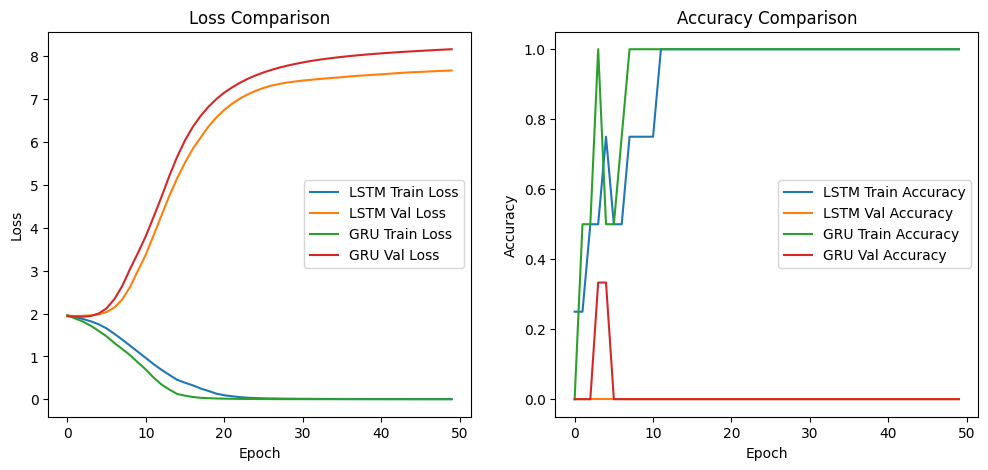

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# ***6. Predict Next Word:***

Build a function to predict the next word based on a user-input sentence.


Showcase example predictions from both models.


In [22]:
import numpy as np

def predict_next_word(model, tokenizer, text, max_sequence_len):
    """
    Predict the next word for a given input text using the trained model.

    Args:
        model: Trained Keras model (LSTM or GRU).
        tokenizer: Fitted Keras Tokenizer.
        text: Input text string (partial sentence).
        max_sequence_len: Fixed length of sequences model expects.

    Returns:
        predicted_word: The predicted next word as a string.
    """
    # Tokenize and convert to sequence of integers
    token_list = tokenizer.texts_to_sequences([text])[0]

    # Pad the sequence to max_sequence_len (input_length)
    token_list = np.array(token_list)
    if len(token_list) < max_sequence_len:
        token_list = np.pad(token_list, (max_sequence_len - len(token_list), 0), mode='constant')
    else:
        token_list = token_list[-max_sequence_len:]

    token_list = token_list.reshape(1, max_sequence_len)

    # Predict probabilities for the next word
    predicted_probs = model.predict(token_list, verbose=0)

    # Get index of the word with highest probability
    predicted_index = np.argmax(predicted_probs, axis=-1)[0]

    # Convert index back to word
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            return word

    return ""


In [23]:
# Example input
input_text = "hello machine"

# Predict next word using LSTM model
predicted_word_lstm = predict_next_word(lstm_model, tokenizer, input_text, max_sequence_len)
print(f"LSTM prediction for '{input_text}': {predicted_word_lstm}")

# Predict next word using GRU model
predicted_word_gru = predict_next_word(gru_model, tokenizer, input_text, max_sequence_len)
print(f"GRU prediction for '{input_text}': {predicted_word_gru}")


LSTM prediction for 'hello machine': hello
GRU prediction for 'hello machine': hello
